## [TPS-Apr] Highlighting the Data ✨✨✨

> Please be sure to leave a reference when using code or taking ideas in my visualizations.

![](https://media.nationalgeographic.org/assets/photos/000/273/27302_c0-41-990-701_r1050x700.jpg?d4ccf3044d9da0d0118103be3a76bd1319370847)

This time, let's take a look at how we can emphasize more in the visualization.

I focused on the train dataset to do visualization and EDA.

It would be nice to refer to other notebooks for the difference between train and test.

> Based on this EDA, automl inference notebook is [here](https://www.kaggle.com/subinium/how-to-use-pycaret-with-feature-engineering).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(f'matplotlib ver : {mpl.__version__}')

matplotlib ver : 3.4.0


## Matplotlib Color & Default Setting

- reference : https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

In [2]:
from cycler import cycler

mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['font.family'] = 'serif'

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255


mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)

survived_palette = ['#dddddd', mpl.colors.to_hex(light_palette[2])]
sex_palette = [light_palette[0], light_palette[3]]


Most Visulization **reference** : https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

## About Titanic

> wikipedia : https://en.wikipedia.org/wiki/Titanic

```
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 

1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers 

and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the 

deadliest peacetime sinking of a superliner or cruise ship to date. With much public attention in the aftermath the disaster 

has since been the material of many artistic works and a founding material of the disaster film genre.
```




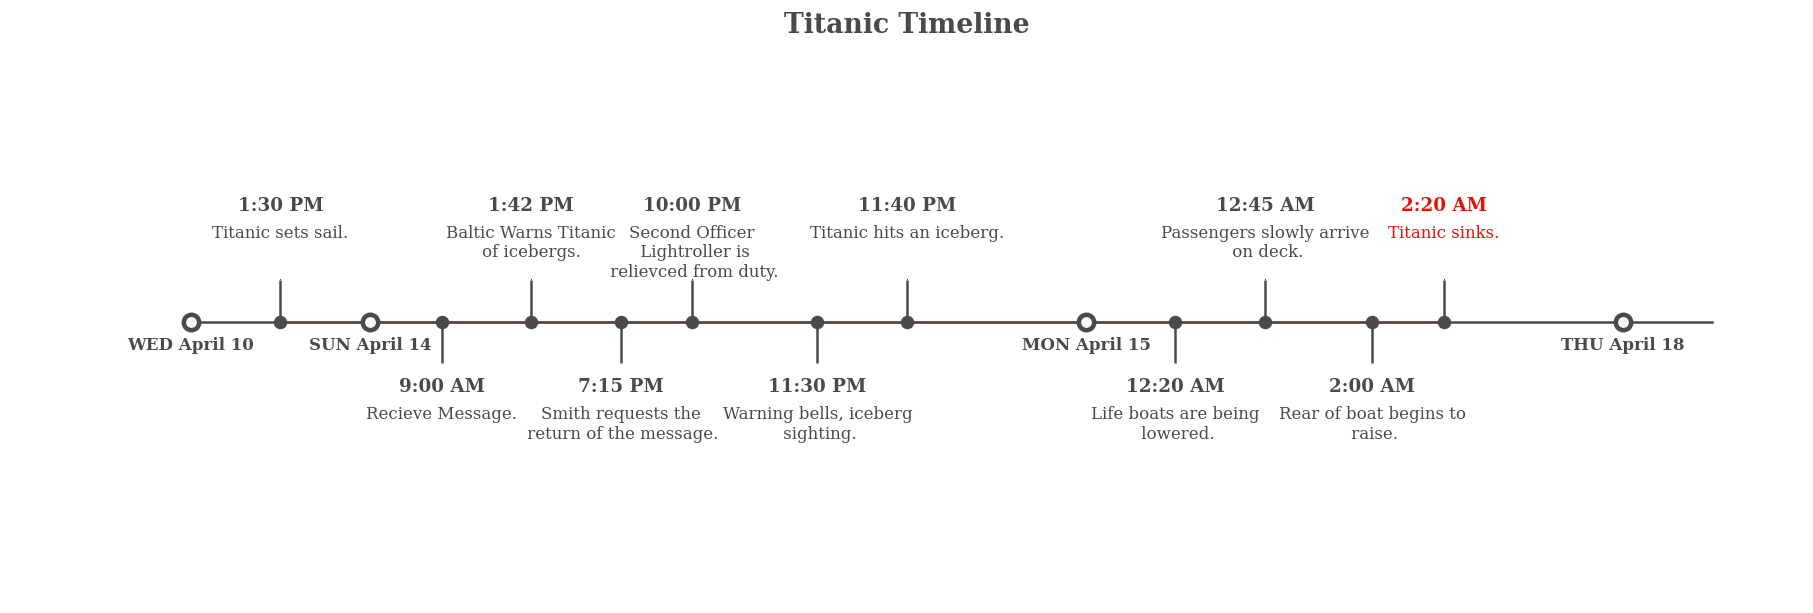

In [3]:
from datetime import datetime


tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

## Import Dataset

In [4]:
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')

The data features themselves are like titanic and the total number has increased a lot.

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,100000.000000,100000.000000,100000.000000,100000,100000,96708.000000,100000.000000,100000.000000,95377,99866.00000,32134,99750
unique,NaN,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,26992,3
top,NaN,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,C19828,S
freq,NaN,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,6,72139
mean,49999.500000,0.427740,2.106910,NaN,NaN,38.355472,0.397690,0.454560,NaN,43.92933,NaN,NaN
std,28867.657797,0.494753,0.837727,NaN,NaN,18.313556,0.862566,0.950076,NaN,69.58882,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.68000,NaN,NaN
25%,24999.750000,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.04000,NaN,NaN
50%,49999.500000,0.000000,2.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,24.46000,NaN,NaN
75%,74999.250000,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.50000,NaN,NaN


## Sex & Survived 

- Survival is visualized with more focus on the survivors using `gray` and `green`.

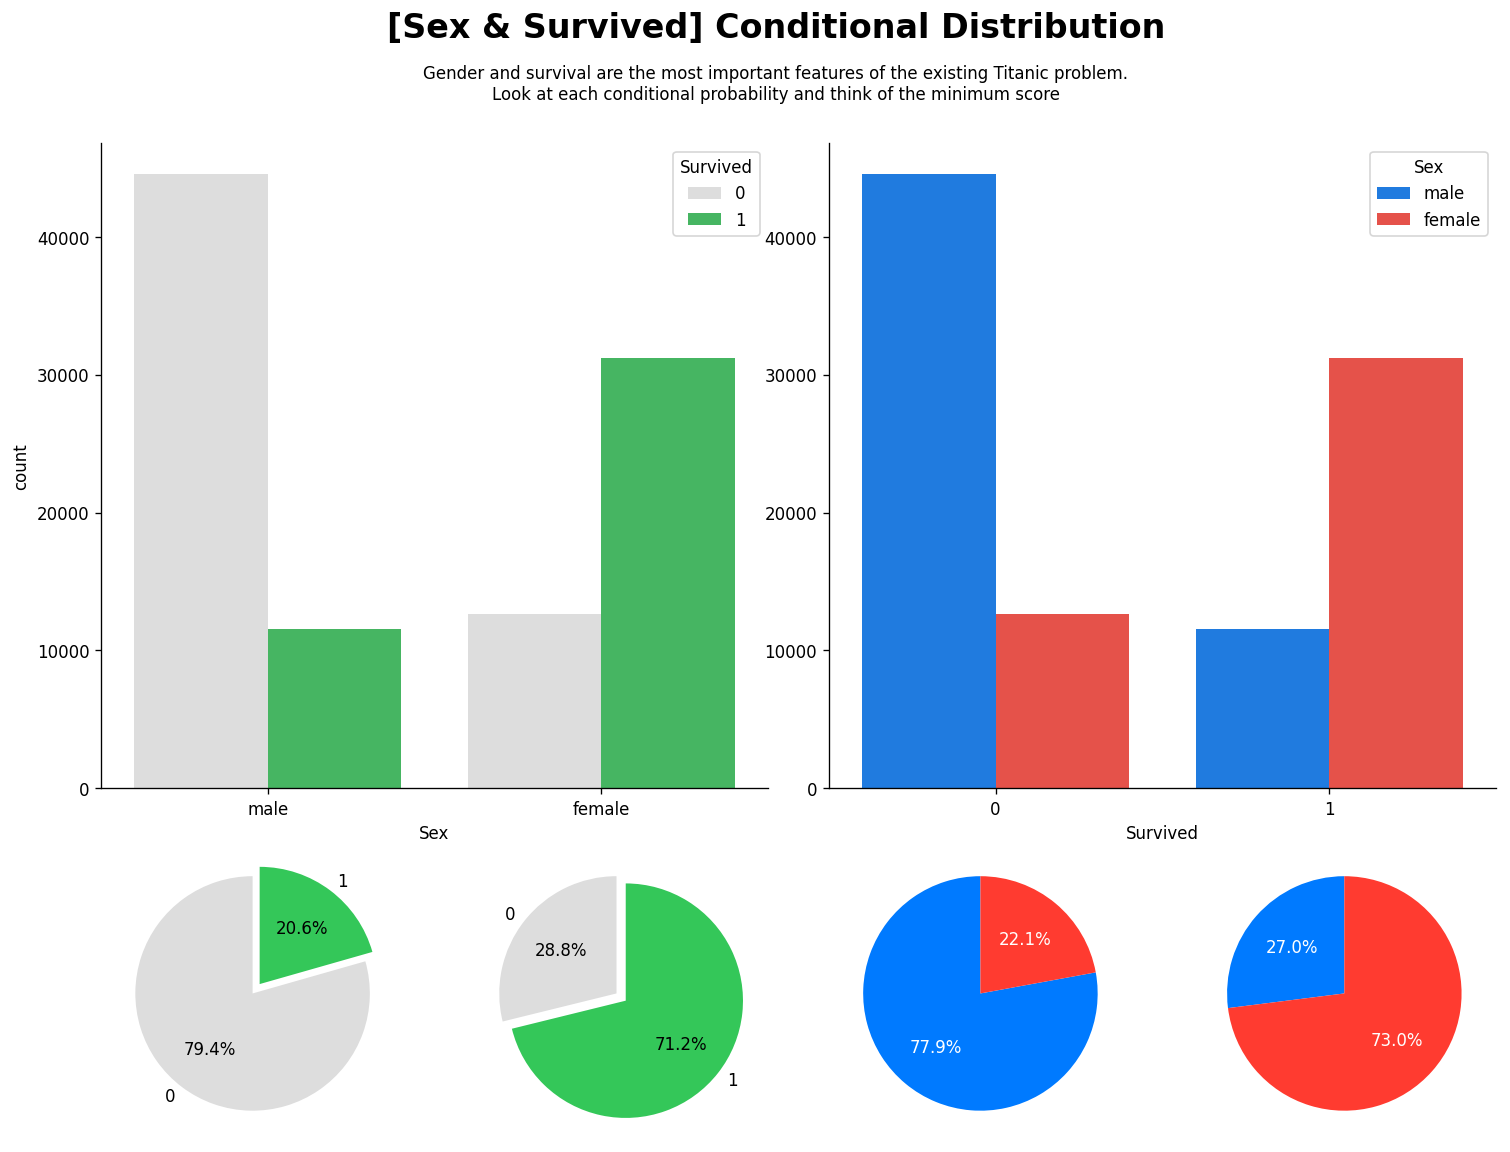

In [7]:
fig = plt.figure(figsize=(15, 11))

gs = fig.add_gridspec(3, 4)



ax_sex_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Sex',hue='Survived', data=train, ax=ax_sex_survived, 
              palette=survived_palette)

ax_survived_sex = fig.add_subplot(gs[:2,2:4], sharey=ax_sex_survived)
sns.countplot(x='Survived',hue='Sex', data=train, ax=ax_survived_sex,
              palette=sex_palette
             )

# ax_survived_sex.set_yticks([])
ax_survived_sex.set_ylabel('')

ax_pie_male = fig.add_subplot(gs[2, 0])
ax_pie_female = fig.add_subplot(gs[2, 1])
ax_pie_notsurvived = fig.add_subplot(gs[2, 2])
ax_pie_survived = fig.add_subplot(gs[2, 3])

# Sex
male = train[train['Sex']=='male']['Survived'].value_counts().sort_index()
ax_pie_male.pie(male, labels=male.index, autopct='%1.1f%%',explode = (0, 0.1), startangle=90,
               colors=survived_palette
               )

female = train[train['Sex']=='female']['Survived'].value_counts().sort_index()
ax_pie_female.pie(female, labels=female.index, autopct='%1.1f%%',explode = (0, 0.1), startangle=90,
                colors=survived_palette
                 )

# Survived
notsurvived = train[train['Survived']==0]['Sex'].value_counts()[['male', 'female']]
ax_pie_notsurvived.pie(notsurvived, labels=notsurvived.index, autopct='%1.1f%%',startangle=90,
                      colors=sex_palette, textprops={'color':"w"}
                      )

survived = train[train['Survived']==1]['Sex'].value_counts()[['male', 'female']]
ax_pie_survived.pie(survived, labels=survived.index, autopct='%1.1f%%', startangle=90,
                    colors=sex_palette, textprops={'color':"w"}
                   )

fig.suptitle('[Sex & Survived] Conditional Distribution', fontweight='bold', fontsize=20)
fig.text(s='''Gender and survival are the most important features of the existing Titanic problem.\nLook at each conditional probability and think of the minimum score''', 
         x=0.5, y= 0.94, ha='center', va='top')

plt.show()

## Age Distribution Check

In the past, <b style='color:green'>green</b> has been a good way to indicate safety and <b style='color:red'>red</b> to indicate danger.

The lowest survival rate is red, and the best is green.

In [8]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['Age band'] = train['Age'].apply(age_band)
titanic_age = train[['Age band', 'Survived']].groupby('Age band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100
age_band = train['Age band'].value_counts().sort_index()


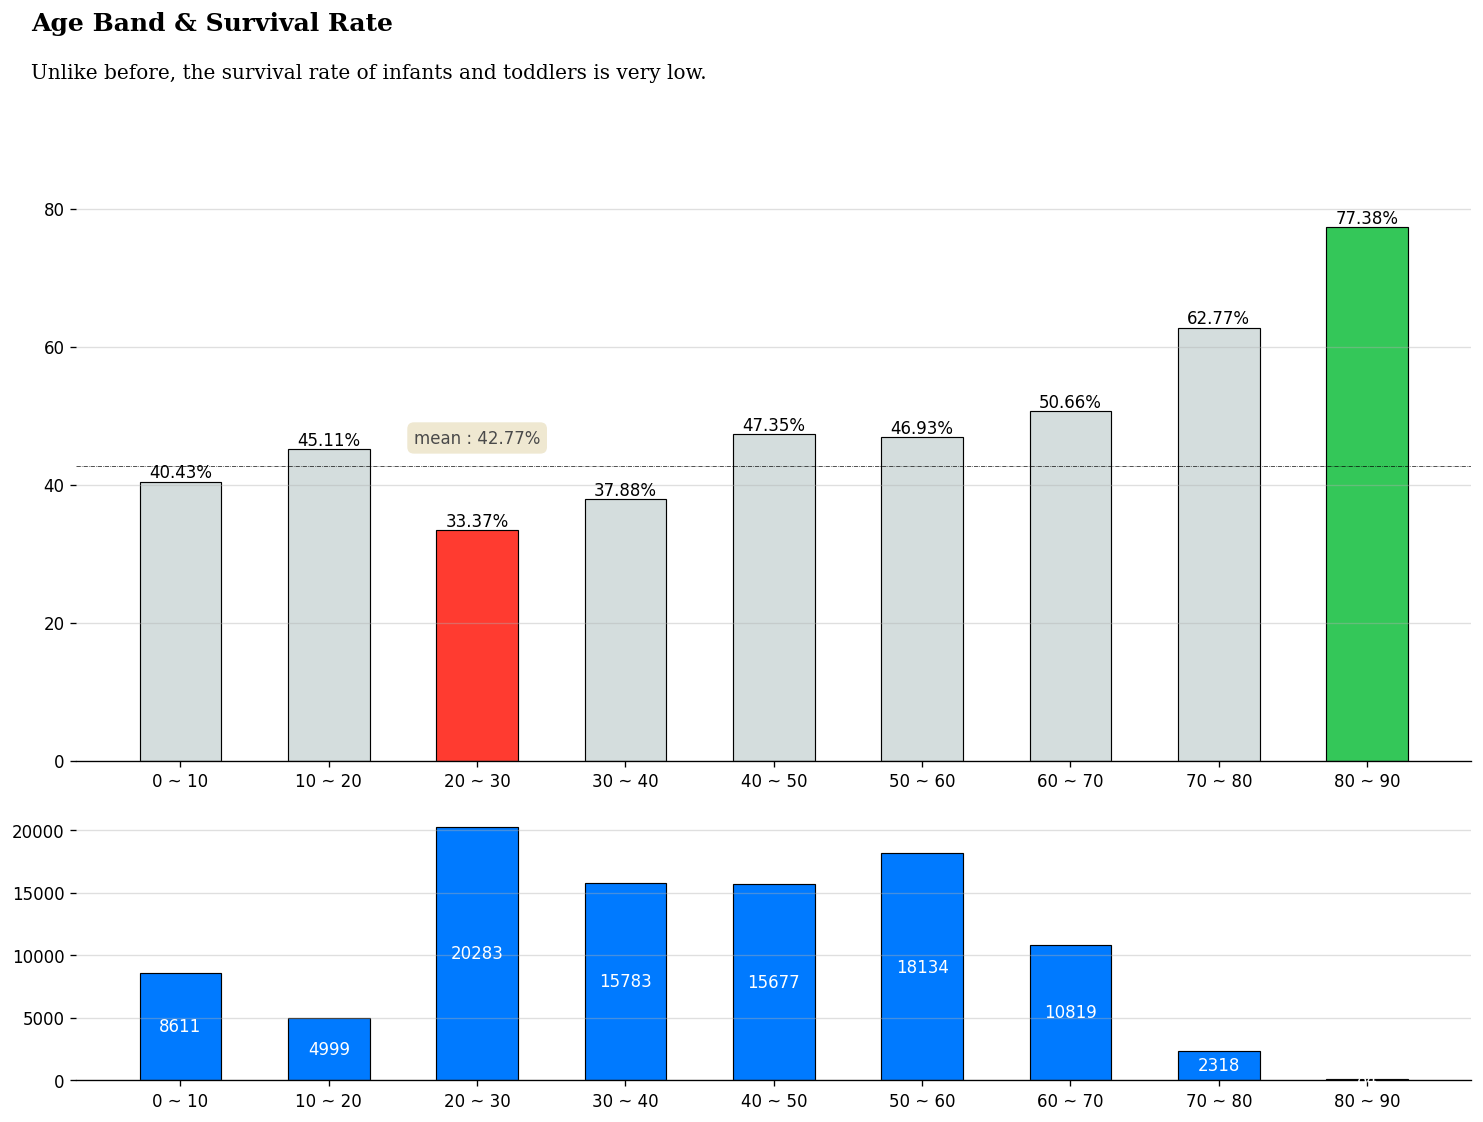

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:-1,:])

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = light_palette[3]
color_map[8] = light_palette[2]


bars = ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, fmt='%.2f%%')


# mean line + annotation
mean = train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('20 ~ 30', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    


ax.set_yticks(np.arange(0, 81, 20))
ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.set_ylim(0, 85)


ax_bottom = fig.add_subplot(gs[-1,:])
bars = ax_bottom.bar(age_band.index, age_band, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax_bottom.spines[["top","right","left"]].set_visible(False)
ax_bottom.bar_label(bars, fmt='%d', label_type='center', color='white')
ax_bottom.grid(axis='y', linestyle='-', alpha=0.4)

# Title & Subtitle    
fig.text(0.1, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif', ha='left')
fig.text(0.1, 0.96, 'Unlike before, the survival rate of infants and toddlers is very low.', fontsize=12, fontweight='light', fontfamily='serif', ha='left')

plt.show()

## SibSp & Parch

Survival rates by `SibSp`, `Parch` feature are as follows:

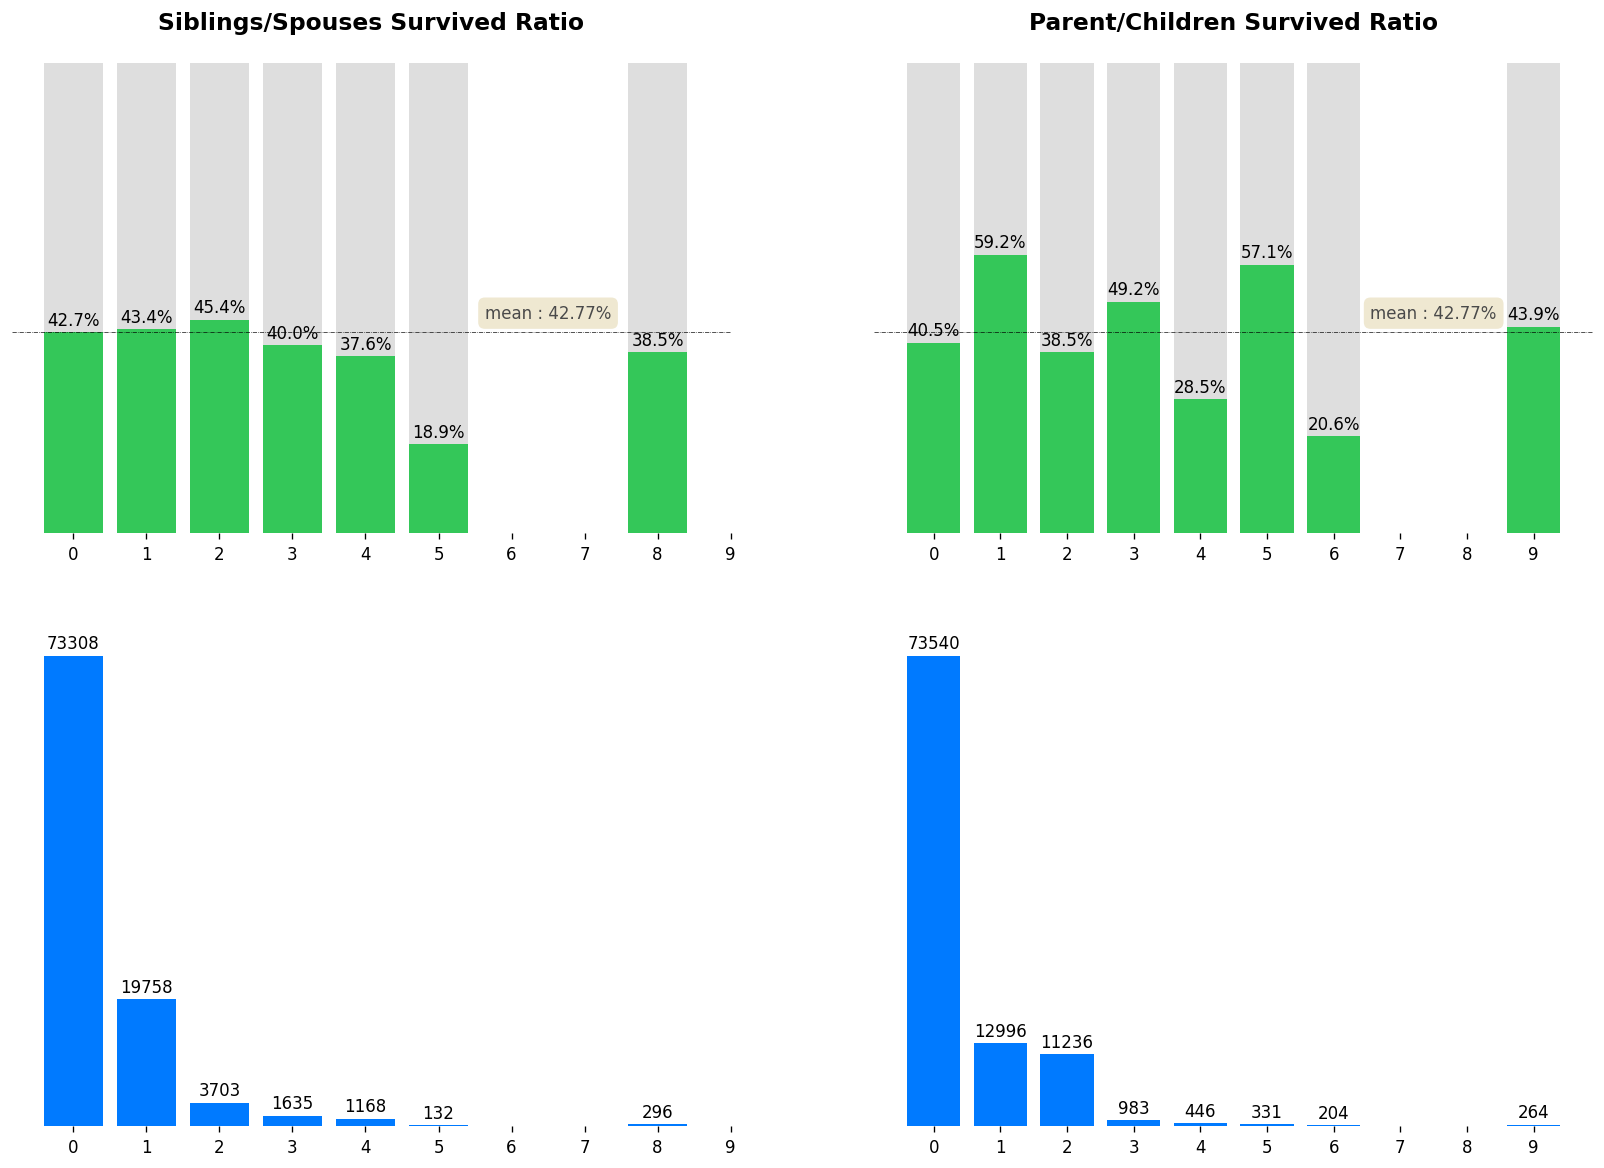

In [10]:
sibsp = train.groupby('SibSp')['Survived'].mean().sort_index()*100
parch = train.groupby('Parch')['Survived'].mean().sort_index()*100

fig, axes = plt.subplots(2, 2, figsize=(17, 12))

# Ratio 1
axes[0][0].bar(height=100, x=sibsp.index, color='#dedede')
hbar1 = axes[0][0].bar(height=sibsp, x=sibsp.index, color=light_palette[2])
axes[0][0].bar_label(hbar1, fmt='%.01f%%', padding=2)

# Bar1
sibsp_cnt = train['SibSp'].value_counts().sort_index()
bar1 = axes[1][0].bar(height=sibsp_cnt, x=sibsp_cnt.index)
axes[1][0].bar_label(bar1, fmt='%d', padding=2)

# Ratio 2
axes[0][1].bar(height=100, x=parch.index, color='#dedede')
hbar2 = axes[0][1].bar(height=parch, x=parch.index, color=light_palette[2])
axes[0][1].bar_label(hbar2, fmt='%.01f%%', padding=2)

# Bar2
parch_cnt = train['Parch'].value_counts().sort_index()
bar2 = axes[1][1].bar(height=parch_cnt, x=parch_cnt.index)
axes[1][1].bar_label(bar2, fmt='%d', padding=2)

for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_xticks(range(0, max(parch.index)+1))
    ax.spines[['bottom', 'left']].set_visible(False)

axes[0][0].axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
axes[0][1].axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')

for idx, ax in enumerate(axes[0]):
    ax.annotate(f"mean : {mean :.4}%", 
            xy=(6.5+idx, mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a', fontsize=10,
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

axes[0][0].set_title('Siblings/Spouses Survived Ratio', fontsize=14, fontweight='bold')
axes[0][1].set_title('Parent/Children Survived Ratio', fontsize=14, fontweight='bold')



plt.show()

### Feature Engineering : Family

In the past, in Titanic feature engineering, it was common to combine `SibSp` and `Parch` to create `Family` features. 

Let's take a look.

In [11]:
train['Family'] = train['SibSp'] + train['Parch']
family_ratio = train.groupby('Family')['Survived'].mean() * 100

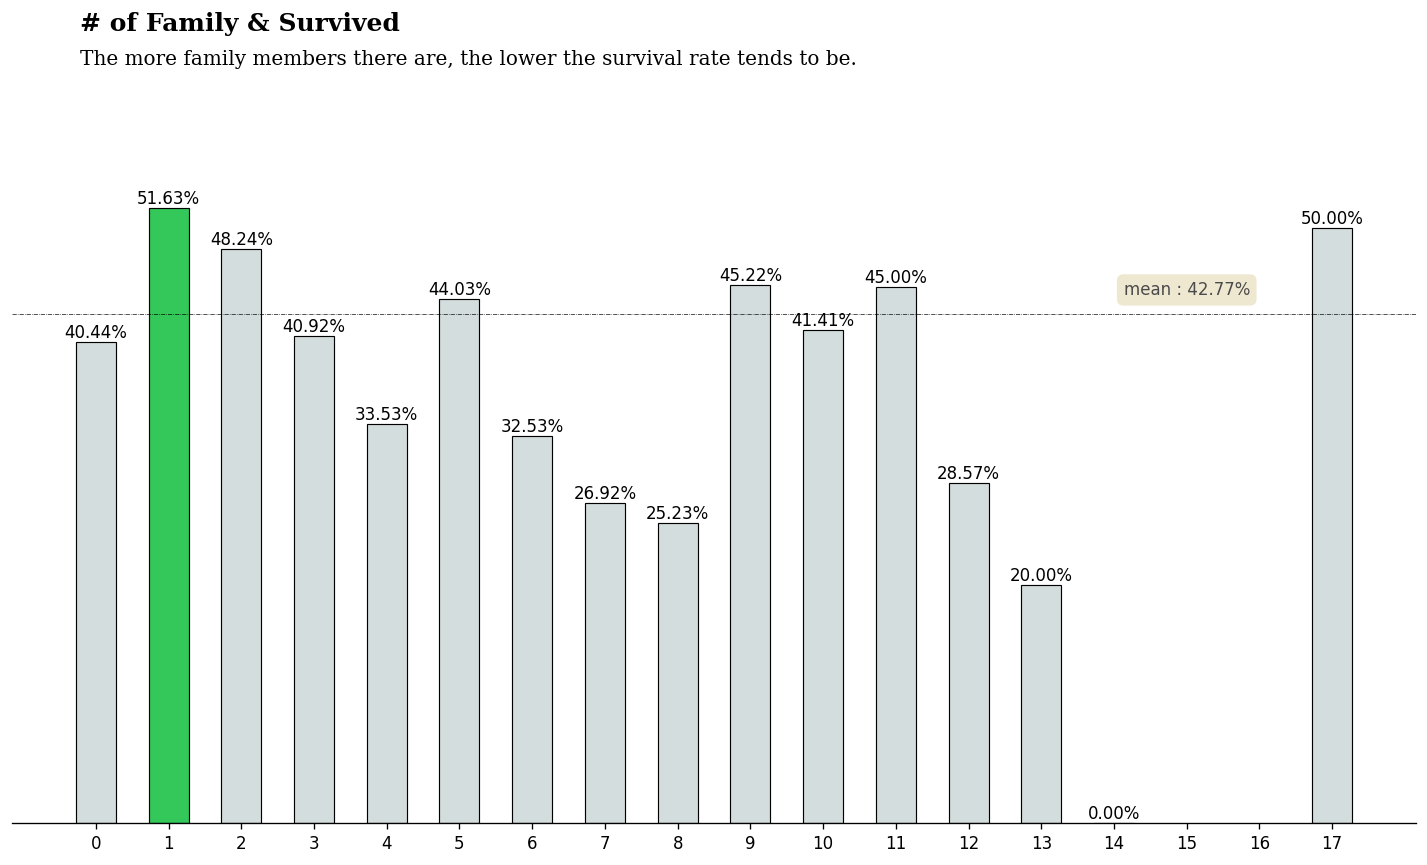

In [12]:

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

color_map = ['#d4dddd' for _ in range(len(family_ratio))]
color_map[np.argmax(family_ratio)] = light_palette[2]


bars = ax.bar(family_ratio.index, family_ratio, 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, fmt='%.2f%%')

# mean line + annotation
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=(15, mean + 2),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, '# of Family & Survived', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'The more family members there are, the lower the survival rate tends to be.', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_yticks([])
ax.set_xticks(np.arange(0, max(family_ratio.index)+1))
ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.set_ylim(0, 65)

fig.tight_layout()
plt.show()

## Pclass & Survived 

Ridgplot has visual distortion, but is good for lightly comparing the shapes of different distributions.


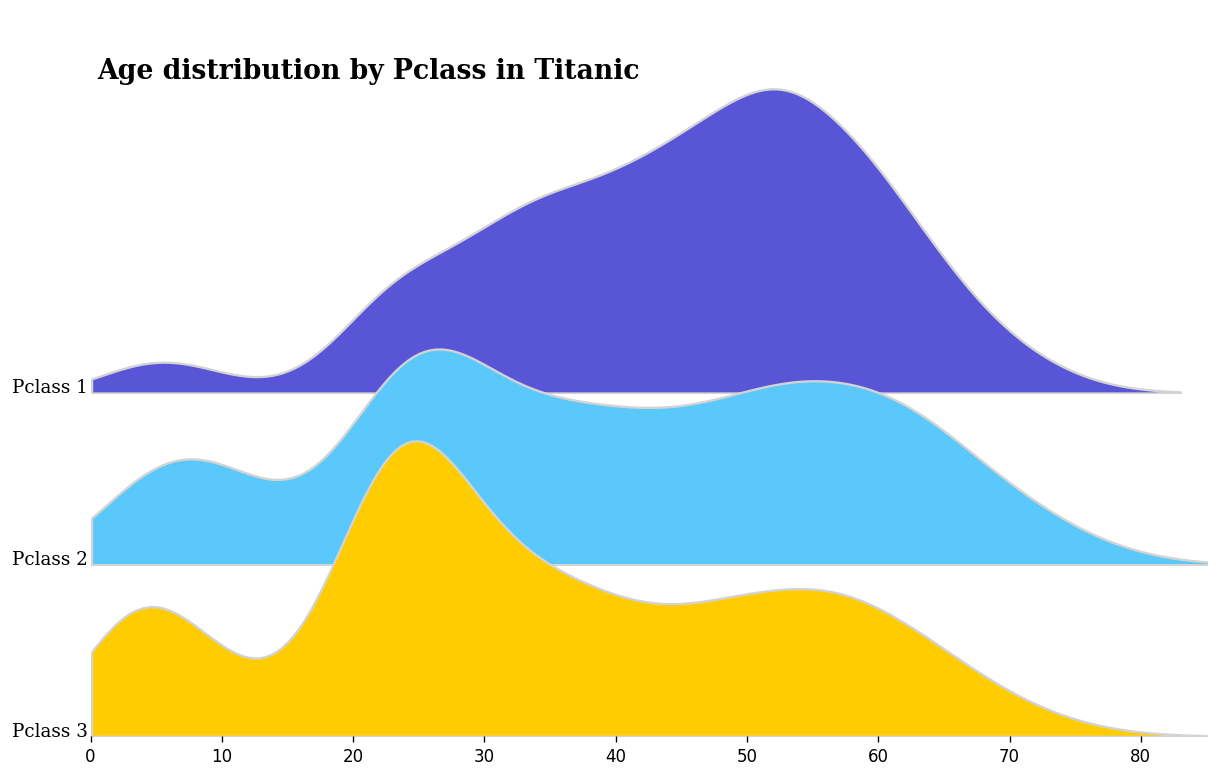

In [13]:
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = light_palette[-3:]

for idx, cls, c in zip(range(3), sorted(train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=train[train['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.20, 
                lw=1.4, edgecolor='lightgray',color=c, alpha=1) 
    
    axes[idx].set_ylim(0, 0.035)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')


    axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()    

Let's compare it according to whether it survives.

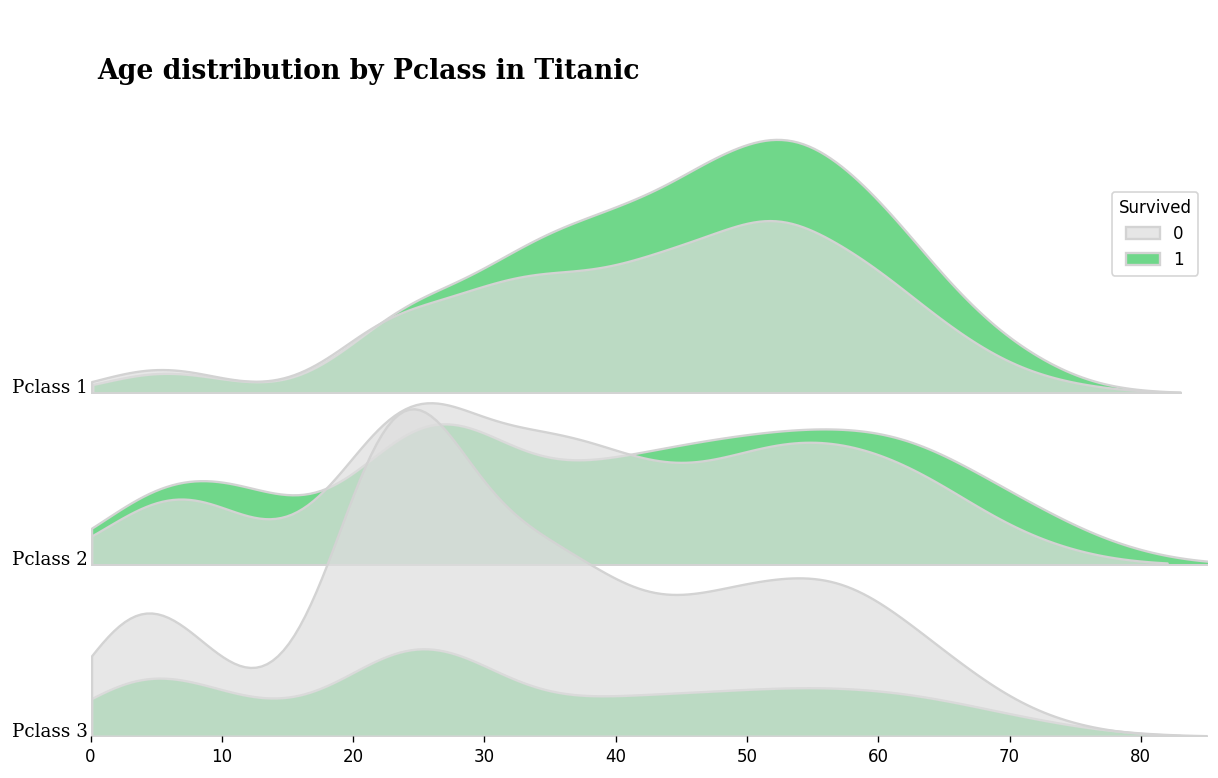

In [14]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()

for idx, cls, c in zip(range(3), sorted(train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=train[train['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.20, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                palette=survived_palette, alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.025)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()   

## Features & Survived Heatmap

Let's see the probability of survival on 2 or more combined features.

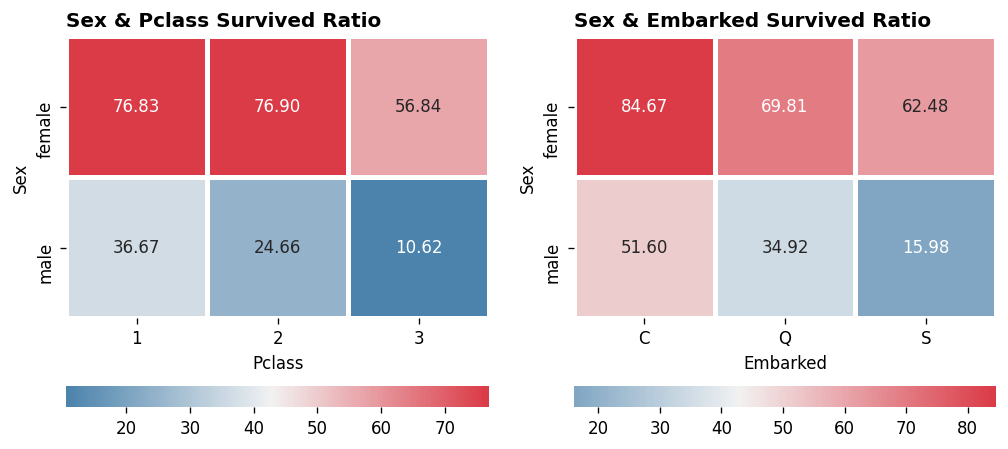

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for idx, feature in enumerate(['Pclass', 'Embarked']):
    sns.heatmap(train.groupby(['Sex', feature])['Survived'].aggregate('mean').unstack()*100, ax=axes[idx],
                square=True, annot=True, fmt='.2f', center=mean, linewidth=2,
                cbar_kws={"orientation": "horizontal"}, cmap=sns.diverging_palette(240, 10, as_cmap=True)
               ) 

axes[0].set_title('Sex & Pclass Survived Ratio', loc='left', fontweight='bold')    
axes[1].set_title('Sex & Embarked Survived Ratio', loc='left', fontweight='bold')    
plt.show()

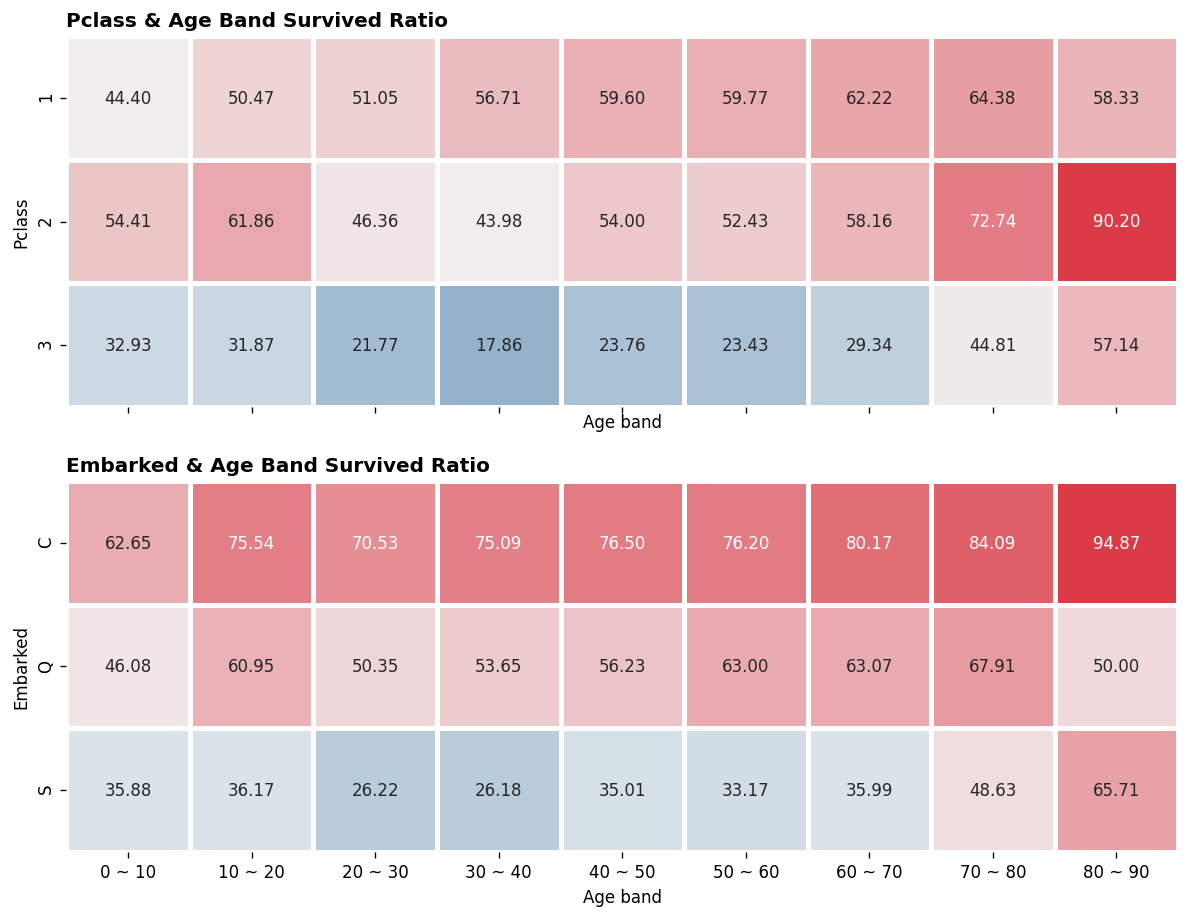

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(12 , 9), sharex=True)

for idx, feature in enumerate(['Pclass', 'Embarked']):
    sns.heatmap(train.groupby([feature, 'Age band'])['Survived'].aggregate('mean').unstack()*100, ax=axes[idx],
                square=True, annot=True, fmt='.2f', center=mean, linewidth=2,
                cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True)
               ) 

axes[0].set_title('Pclass & Age Band Survived Ratio', loc='left', fontweight='bold')    
axes[1].set_title('Embarked & Age Band Survived Ratio', loc='left', fontweight='bold')       
plt.show()

## Dataset Correlation

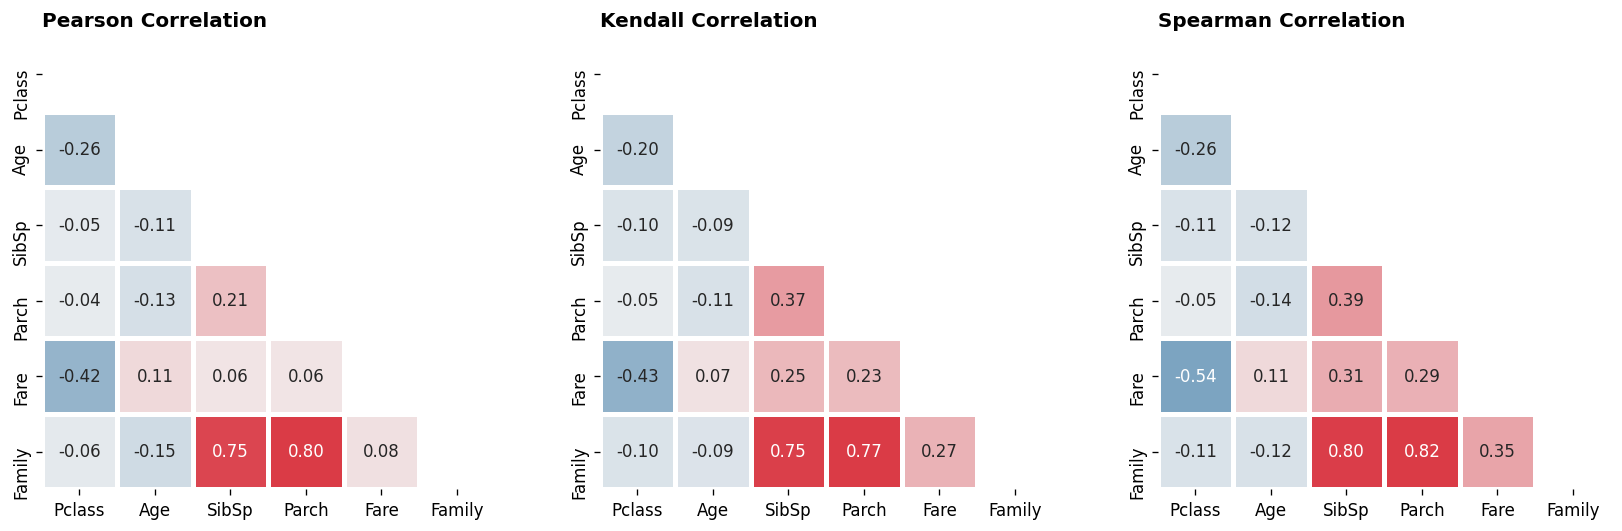

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(17 , 5))

feature_lst = ['Pclass', 'Age', 'SibSp','Parch','Fare', 'Family']

corr = train[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(train[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

## Ticket EDA

`Ticket` has alphabet part(type) + numeric part(number)

In [18]:
def converter(x):
    c, n = '', ''
    x = str(x).replace('.', '').replace('/','').replace(' ', '')
    for i in x:
        if i.isnumeric():
            n += i
        else :
            c += i 
    if n != '':
        return c, int(n)
    return c, np.nan

train['Ticket_type'] = train['Ticket'].apply(lambda x: converter(x)[0])
train['Ticket_number'] = train['Ticket'].apply(lambda x: converter(x)[1])

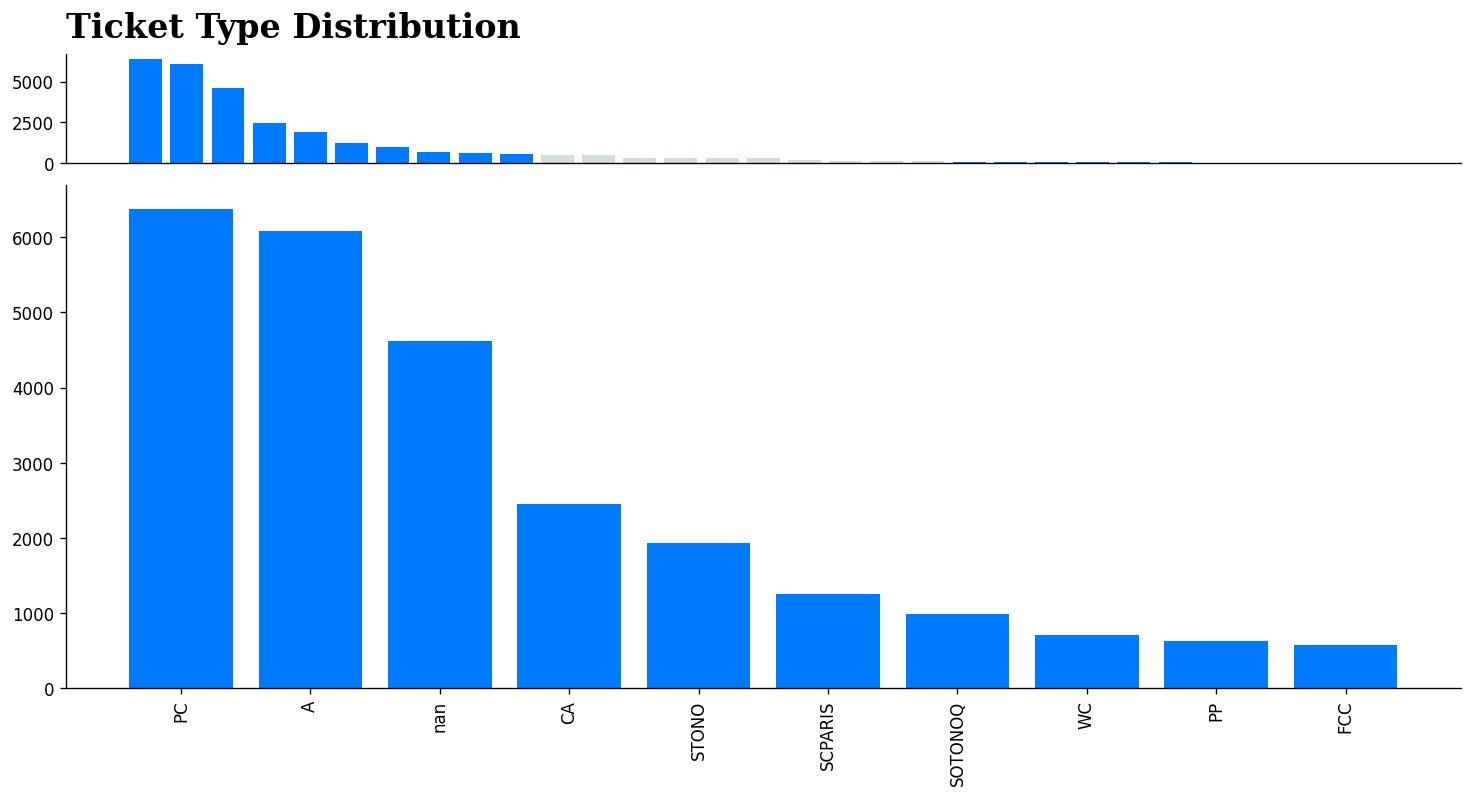

In [19]:
# viz from myself : https://www.kaggle.com/subinium/showusthedata-eda-visualization-utils
fig = plt.figure(figsize=(15, 7))

gs = fig.add_gridspec(5, 6)

ax1 = fig.add_subplot(gs[0,:])
dataset_label = train['Ticket_type'].value_counts()[1:]
ax1.bar(dataset_label.index, dataset_label,
       color=[light_palette[0]]*10 + ['#d4dddd']*(len(dataset_label) - 21)
       )
ax1.set_xticks([])


ax2 = fig.add_subplot(gs[1:,:])
dataset_label = train['Ticket_type'].value_counts()[1:11]
ax2.bar(dataset_label.index, dataset_label)
ax2.set_xticks(range(len(dataset_label.index)))
ax2.set_xticklabels(dataset_label.index, rotation = 90)


fig.text(0.125,0.9,'Ticket Type Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

## Null Data Visualization & Thinking

### Null Data Scale Check

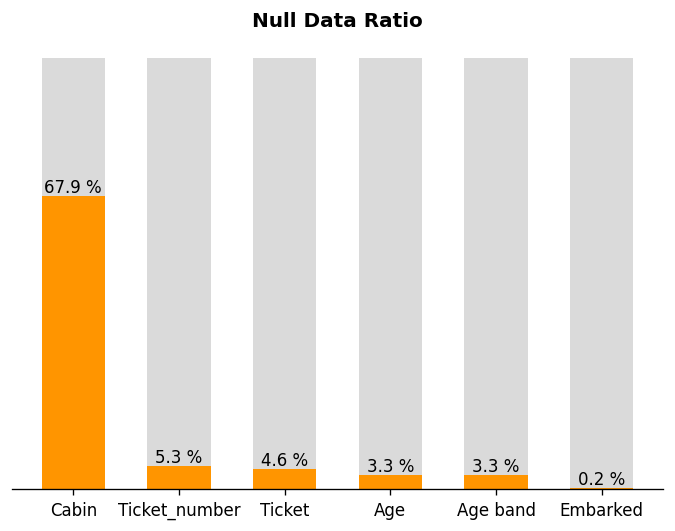

In [20]:
nan_data = (train.isna().sum().sort_values(ascending=False) / len(train) * 100)[:6]
fig, ax = plt.subplots(1,1,figsize=(7, 5))

ax.bar(nan_data.index, 100, color='#dadada', width=0.6)

bar = ax.bar(nan_data.index,nan_data, color=light_palette[1], width=0.6)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Null Data Ratio', fontweight='bold')

plt.show()

Let's fill in the data a bit with the ratio of null data

### Fare Data Distribution

In [21]:
pd.pivot_table(train, values='Fare', index=['Family'],
               columns=['Survived'], aggfunc=[np.mean, np.std]).style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds')

It tends to decrease according to the number of family members, and there seems to be a certain price difference depending on whether or not they survive.

In [22]:
pd.pivot_table(train, values='Fare', index=['Family'],
               columns=['Pclass'], aggfunc=[np.mean, np.std]).style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds')

Separated by Pclass, it is as follows.

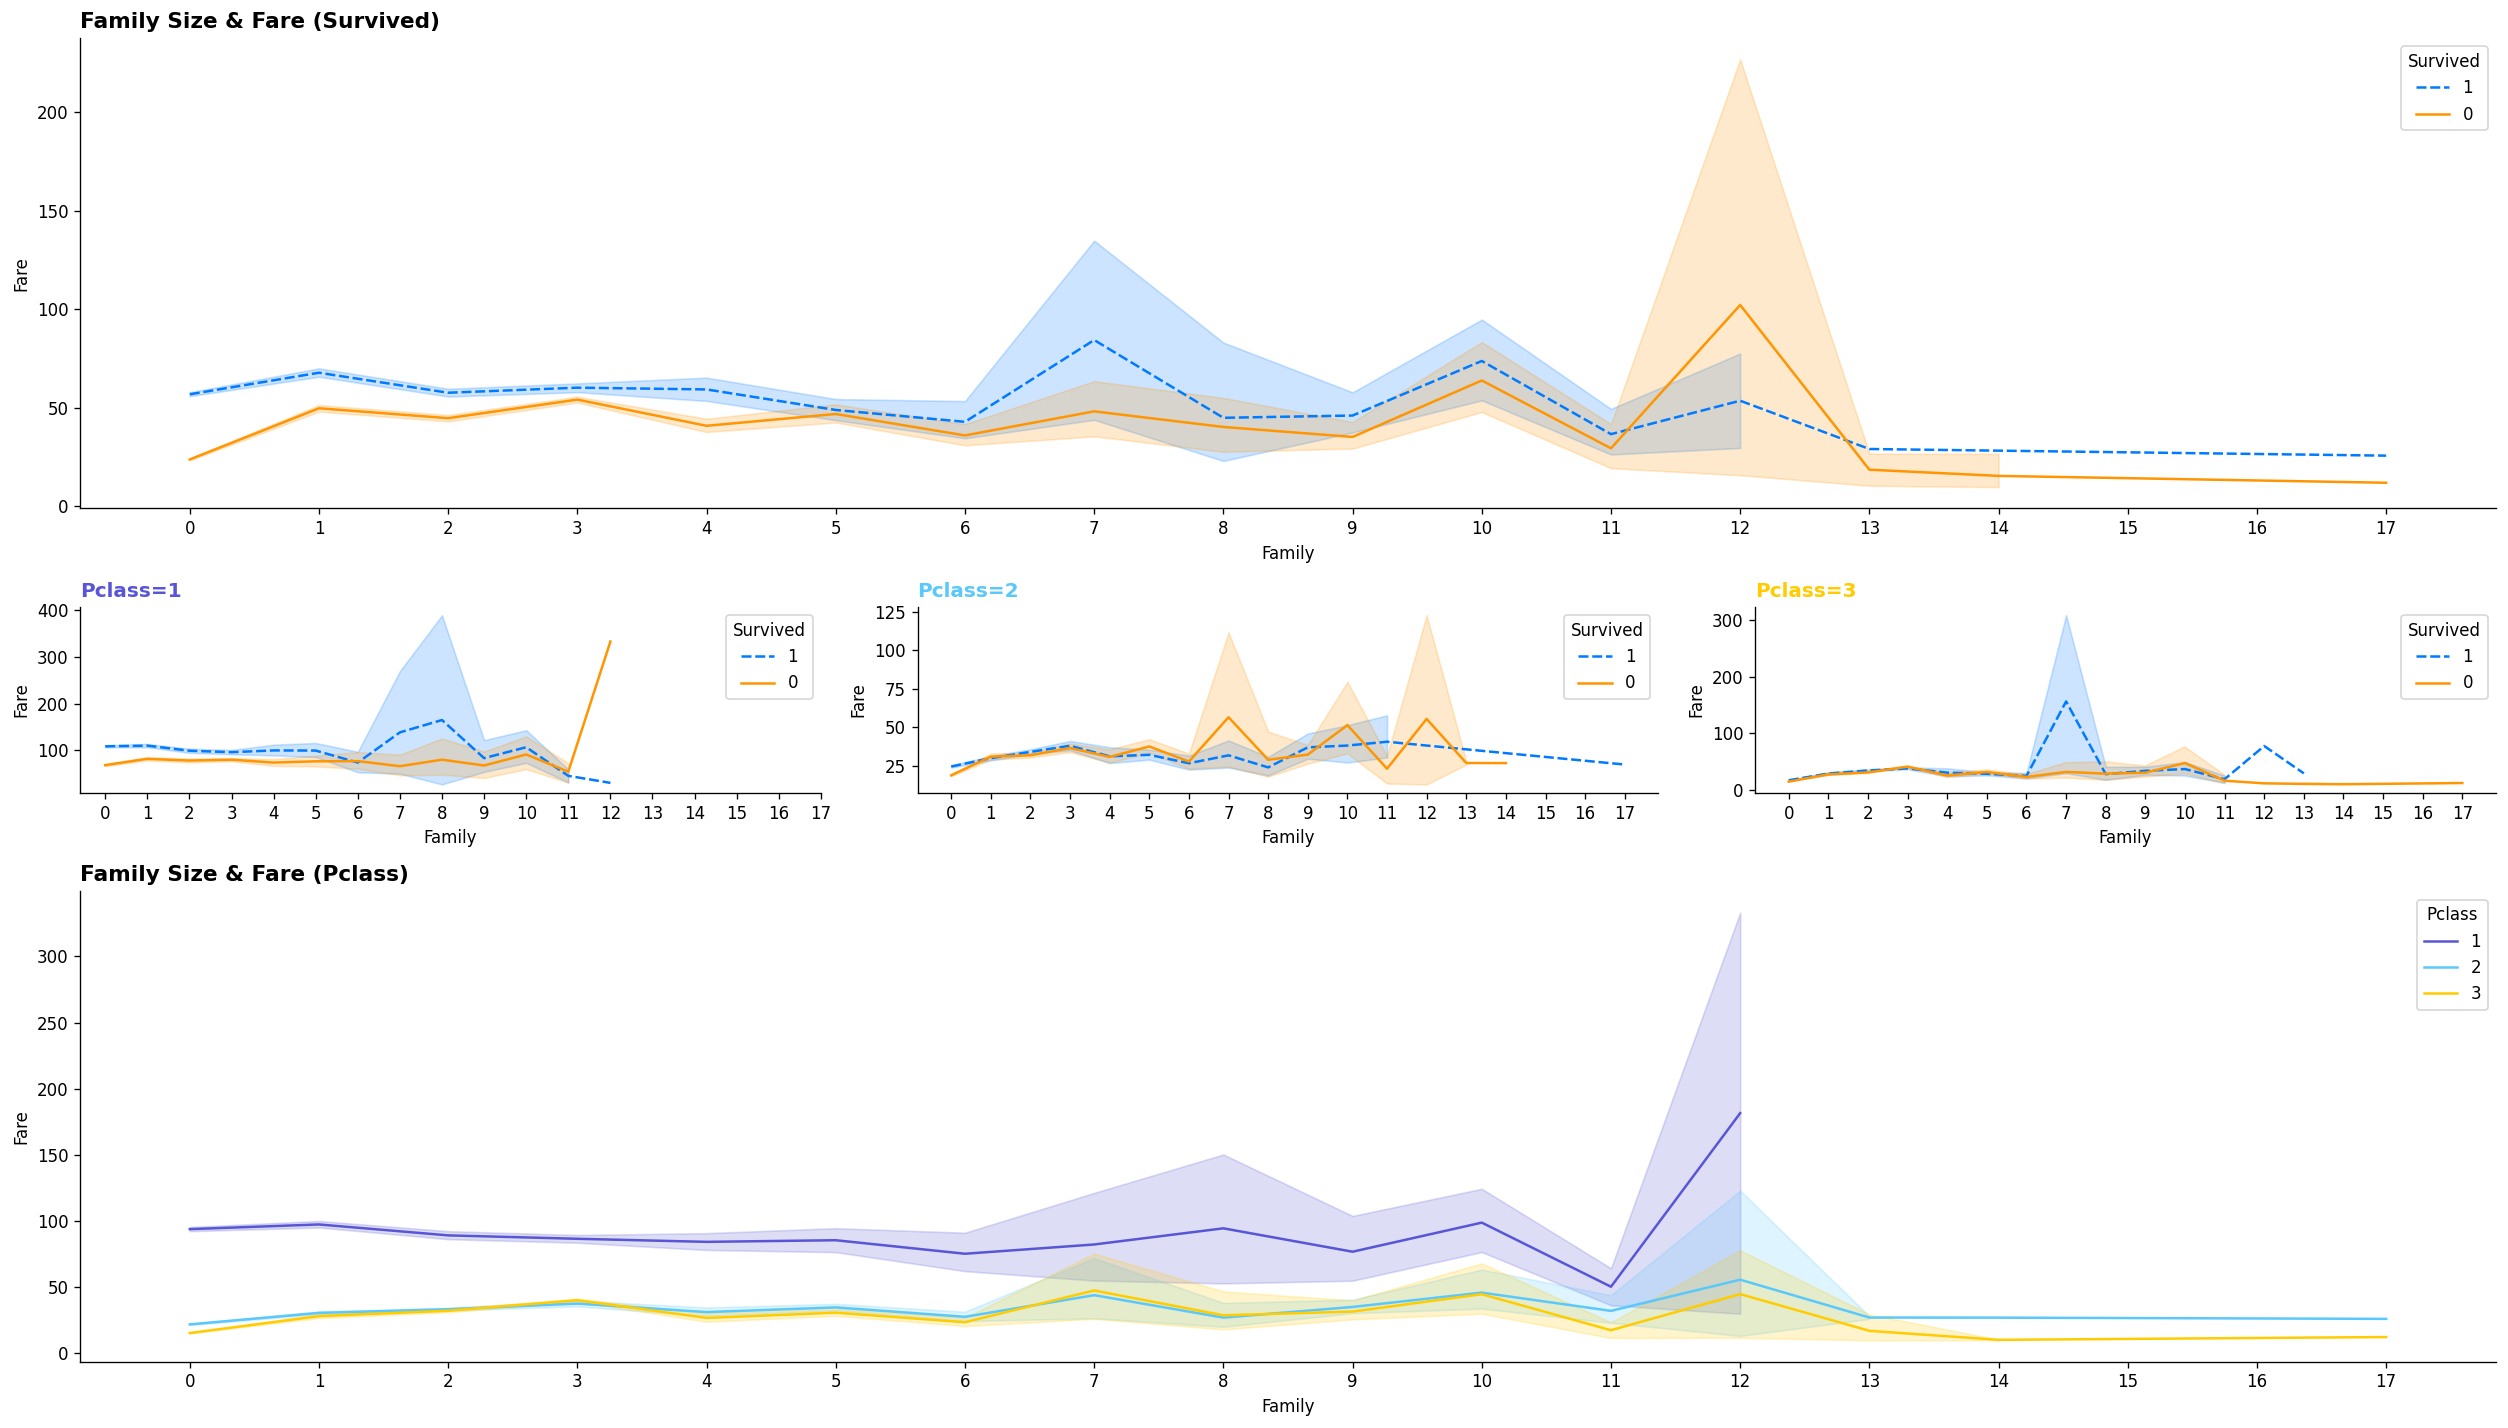

In [23]:
fig = plt.figure(figsize=(21, 12))
gs = fig.add_gridspec(5,3)
ax = fig.add_subplot(gs[:2,:])

sns.lineplot(
    data=train,
    x="Family", y="Fare", hue="Survived", style='Survived', ax=ax, hue_order=[1, 0]
)

ax.set_xticks(range(18))
ax.set_title('Family Size & Fare (Survived)', fontsize=13, fontweight='bold', loc='left')

for pclass in [1, 2, 3]:
    ax = fig.add_subplot(gs[2,pclass-1])
    sns.lineplot(
        data=train[train['Pclass']==pclass],
        x="Family", y="Fare", hue="Survived", style='Survived', hue_order=[1, 0], ax=ax
    )
    ax.set_xticks(range(18))
    ax.set_title(f'Pclass={pclass}', fontweight='bold', loc='left', color=light_palette[-4+pclass])

    
ax = fig.add_subplot(gs[3:,:])

sns.lineplot(
    data=train,
    x="Family", y="Fare", hue="Pclass", palette=[mpl.colors.to_hex(i) for i in light_palette[-3:]], 
    hue_order=[1,2,3], ax=ax
)

ax.set_xticks(range(18))
ax.set_title('Family Size & Fare (Pclass)', fontsize=13, fontweight='bold', loc='left')
    
fig.tight_layout()    
plt.show()

### Age Data Distribution

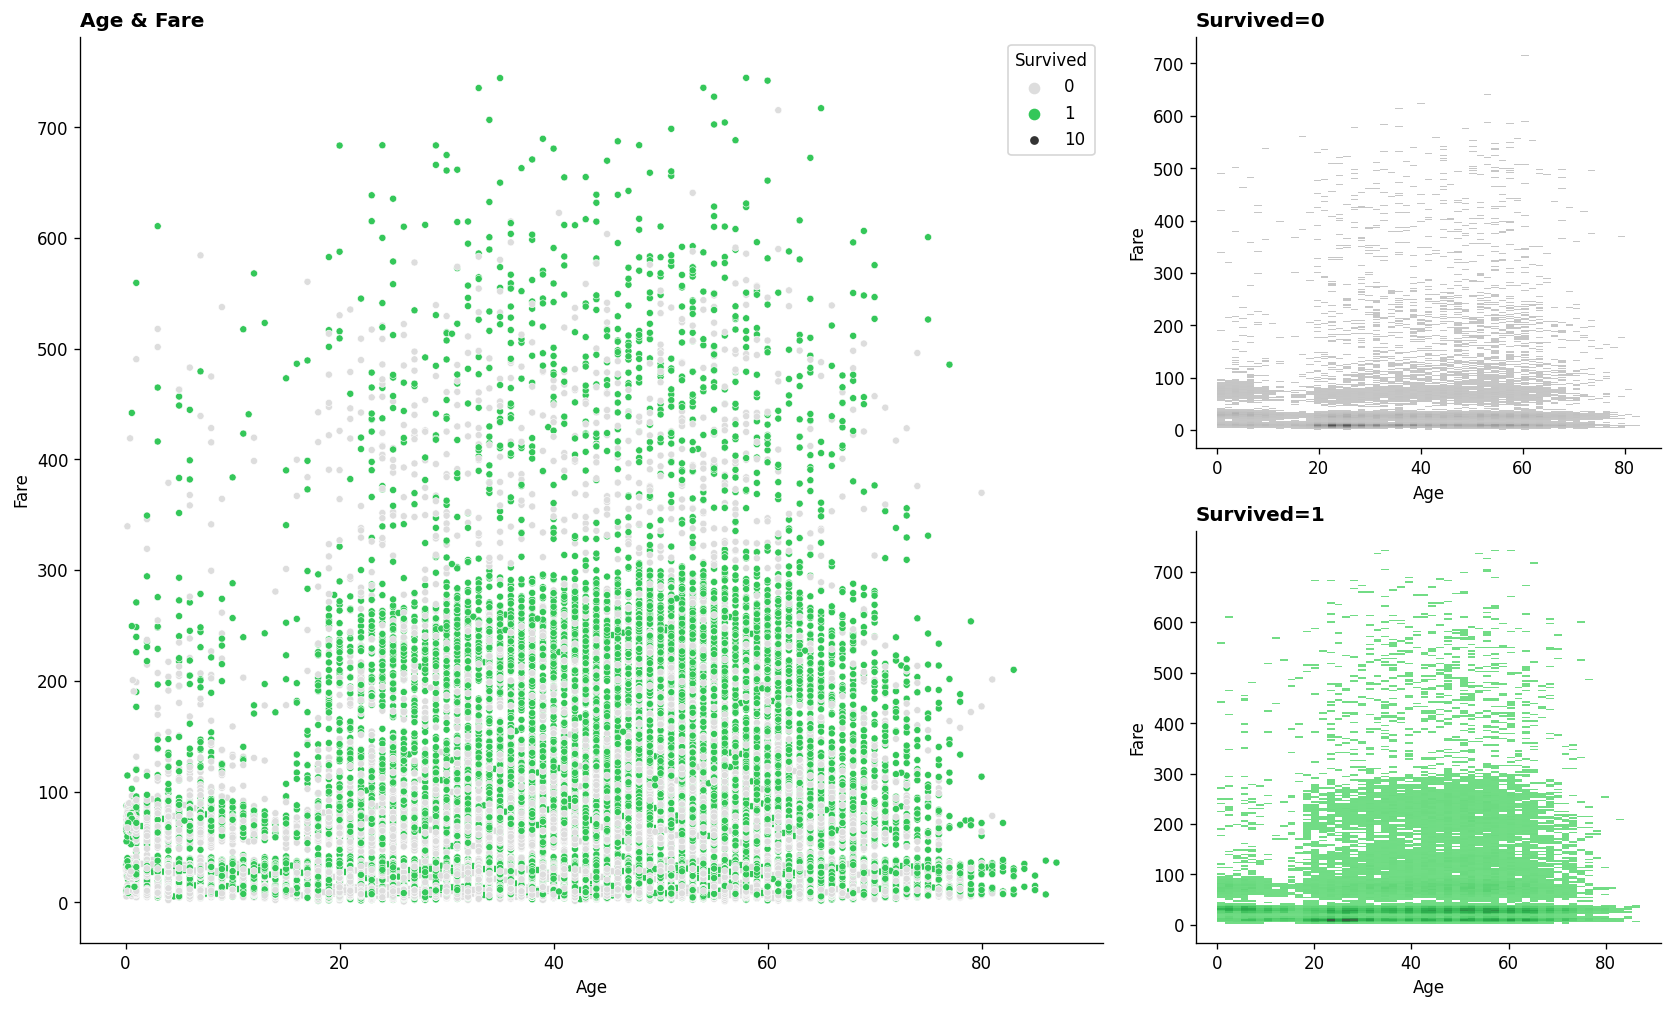

In [24]:
fig = plt.figure(figsize=(17, 10))
gs = fig.add_gridspec(2,3)
ax = fig.add_subplot(gs[:,:2])
sns.scatterplot(x='Age', y='Fare', hue='Survived', size=10, palette=survived_palette, data=train, ax=ax)
ax.set_title(f'Age & Fare', loc='left', fontweight='bold')

for survived in [0, 1]:
    ax = fig.add_subplot(gs[survived,2])
    sns.histplot(x='Age', y='Fare', color=survived_palette[survived], data=train[train['Survived']==survived], ax=ax)
    ax.set_title(f'Survived={survived}', loc='left', fontweight='bold')
    
plt.show()

We can look at the different density of Fare depending on whether it survives or not.

### Please be sure to leave a reference when using code or taking ideas in my visualizations.